In [1]:
import pandas as pd

csv_path = "PostProcessing/Masked/FracTiles_tae_8_crevasse_gray.csv"
df = pd.read_csv(csv_path)

df.head()

,id,x_start,x_stop,y_start,y_stop,x_coord,y_coord,fracture_density
0,1,78,371,84,377,575422.255973,2.475029e+06,0.154750
1,2,372,665,84,377,575433.766071,2.475029e+06,0.201467
2,3,666,959,84,377,575445.276169,2.475029e+06,0.267805
3,4,960,1253,84,377,575456.786266,2.475029e+06,0.146467
4,5,1254,1547,84,377,575468.296364,2.475029e+06,0.167315


In [2]:
df.describe()

,id,x_start,x_stop,y_start,y_stop,x_coord,y_coord,fracture_density
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000
mean,164.500000,2974.079268,3267.079268,2323.957317,2616.957317,575535.637454,2.474941e+06,0.163357
std,94.829672,1773.540430,1773.540430,1338.257641,1338.257641,69.434094,5.239280e+01,0.097782
min,1.000000,78.000000,371.000000,84.000000,377.000000,575422.255973,2.474856e+06,0.002071
25%,82.750000,1548.000000,1841.000000,1260.000000,1553.000000,575479.806462,2.474891e+06,0.090469
50%,164.500000,3018.000000,3311.000000,2436.000000,2729.000000,575537.356950,2.474937e+06,0.154640
75%,246.250000,4488.000000,4781.000000,3612.000000,3905.000000,575594.907438,2.474983e+06,0.219958
max,328.000000,5958.000000,6251.000000,4494.000000,4787.000000,575652.457927,2.475029e+06,0.521496


In [3]:
df.sort_values("fracture_density", ascending=False).head(5)

,id,x_start,x_stop,y_start,y_stop,x_coord,y_coord,fracture_density
96,97,5370,5663,1260,1553,575629.437731,2.474983e+06,0.521496
77,78,5958,6251,966,1259,575652.457927,2.474994e+06,0.521311
49,50,3900,4193,672,965,575571.887243,2.475006e+06,0.518210
93,94,4488,4781,1260,1553,575594.907438,2.474983e+06,0.510921
26,27,3312,3605,378,671,575548.867048,2.475017e+06,0.469839


In [4]:
import xarray as xr
import matplotlib.pyplot as plt

nc_path = "PostProcessing/Masked/tae_8_crevasse_gray.nc"
ds = xr.open_dataset(nc_path)

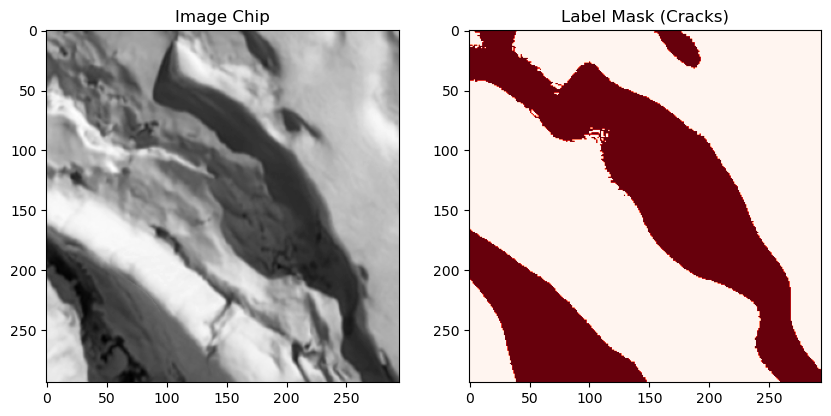

In [5]:
tile_id = 83# burada kendi gördüğün ID’yi yaz
img = ds.image_data.isel(tile=tile_id).values
mask = ds.label_data.isel(tile=tile_id).values

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Image Chip")

ax[1].imshow(mask, cmap="Reds")
ax[1].set_title("Label Mask (Cracks)")
plt.show()


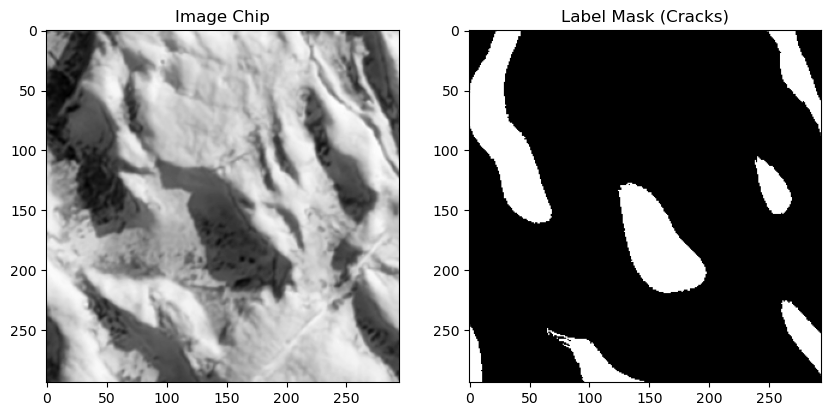

In [6]:
tile_id = 0  # burada kendi gördüğün ID’yi yaz
img = ds.image_data.isel(tile=tile_id).values
mask = ds.label_data.isel(tile=tile_id).values

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Image Chip")

ax[1].imshow(mask, cmap="gray", vmin=0, vmax=1)
ax[1].set_title("Label Mask (Cracks)")
plt.show()

In [7]:
df.sort_values("fracture_density", ascending=True).head(10)

,id,x_start,x_stop,y_start,y_stop,x_coord,y_coord,fracture_density
103,104,1254,1547,1554,1847,575468.296364,2.474971e+06,0.002071
218,219,4488,4781,3024,3317,575594.907438,2.474914e+06,0.002256
312,313,1548,1841,4494,4787,575479.806462,2.474856e+06,0.003344
239,240,4488,4781,3318,3611,575594.907438,2.474902e+06,0.009776
278,279,3900,4193,3906,4199,575571.887243,2.474879e+06,0.013189
217,218,4194,4487,3024,3317,575583.397341,2.474914e+06,0.014010
168,169,1842,2135,2436,2729,575491.316559,2.474937e+06,0.019217
174,175,3606,3899,2436,2729,575560.377145,2.474937e+06,0.019760
243,244,5664,5957,3318,3611,575640.947829,2.474902e+06,0.020096
127,128,2136,2429,1848,2141,575502.826657,2.474960e+06,0.022583


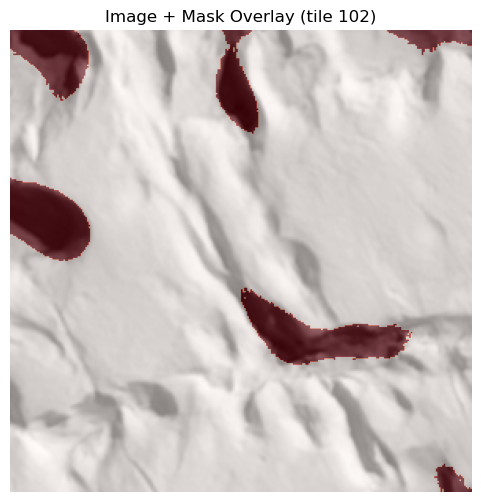

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

# Görmek istediğin tile ID (istersen değiştir)
tile_id = 102

# Image ve mask verisini al
img = ds.image_data.isel(tile=tile_id).values
mask = ds.label_data.isel(tile=tile_id).values

# Overlay plot
plt.figure(figsize=(6, 6))

plt.imshow(img, cmap="gray")
plt.imshow(mask, cmap="Reds", alpha=0.5, vmin=0, vmax=1)

plt.title(f"Image + Mask Overlay (tile {tile_id})")
plt.axis("off")

plt.show()


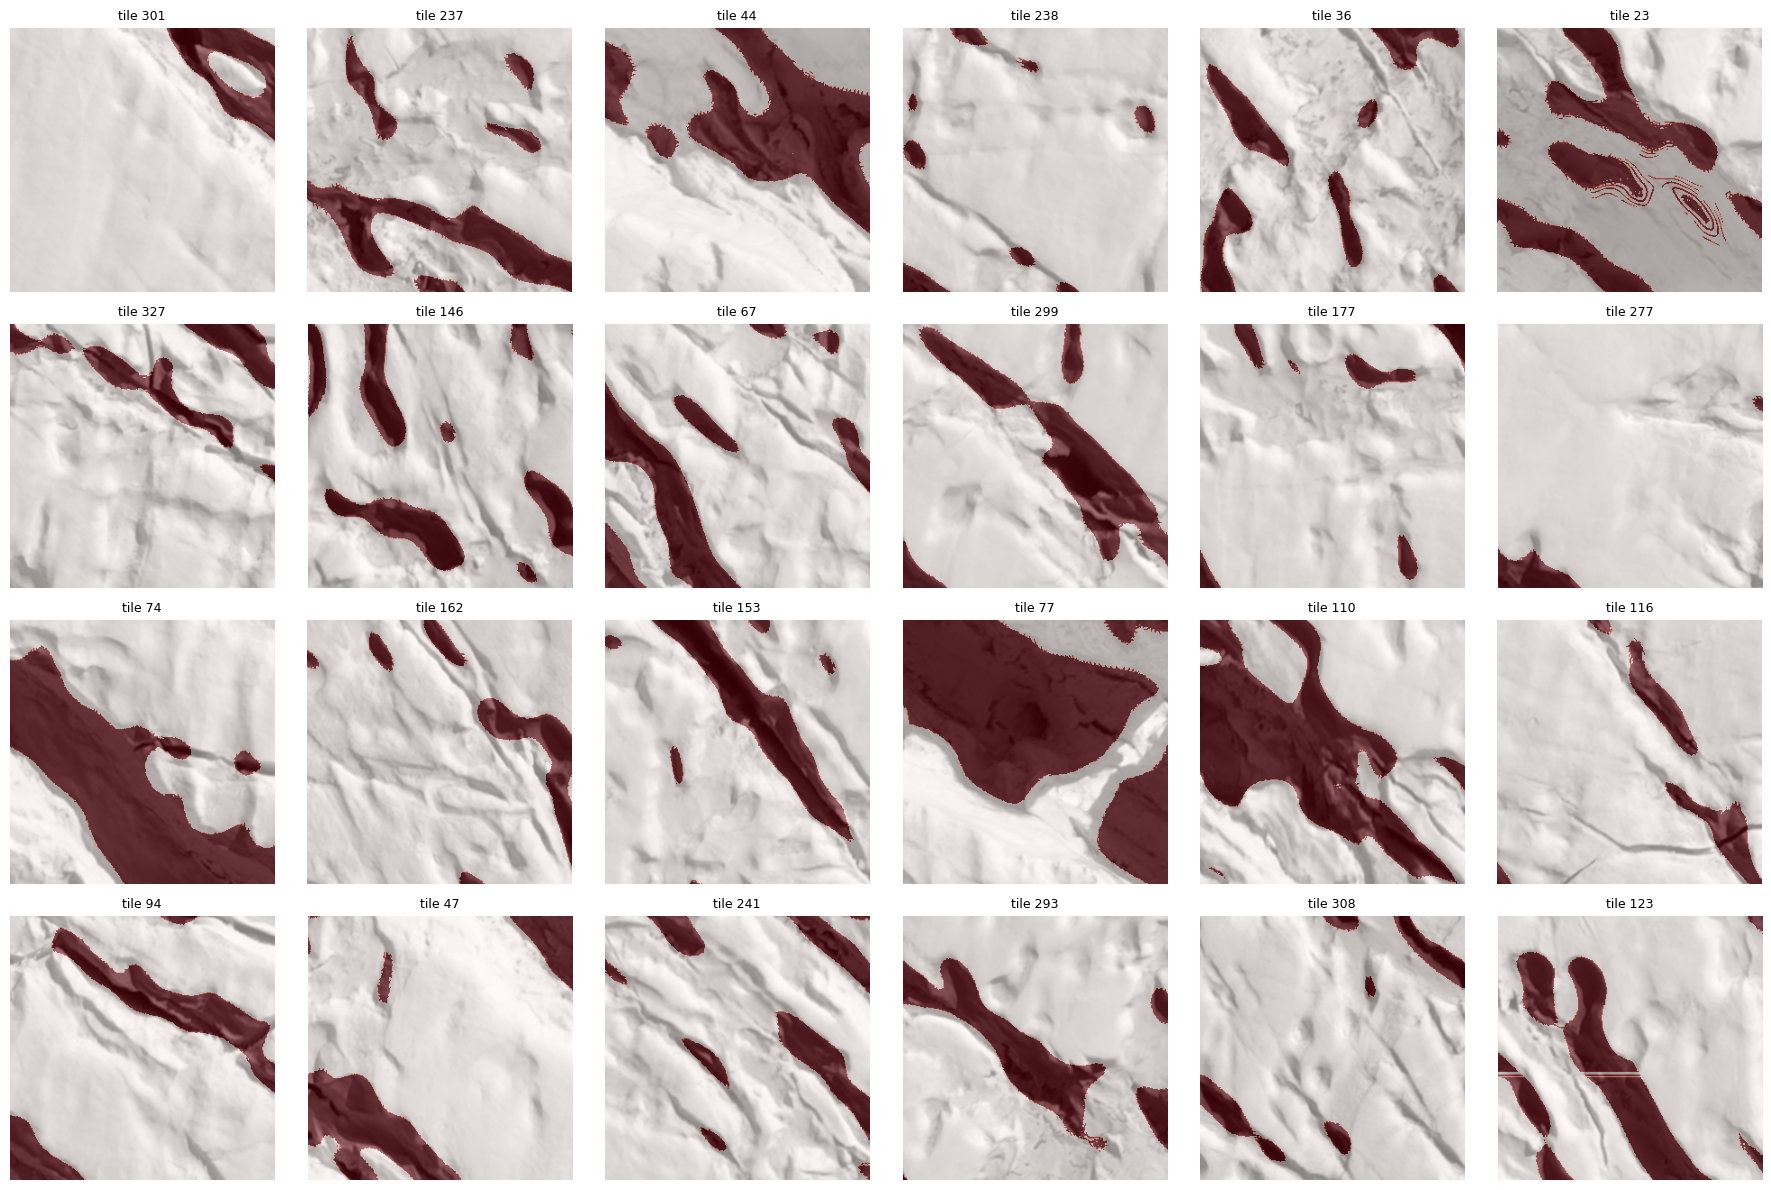

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Kaç tane gösterelim?
N = 24  # 24 = 4x6 güzel durur

# İstersen rastgele seç:
tile_ids = np.random.choice(ds.sizes["tile"], size=N, replace=False)

# Ya da ilk N tile:
# tile_ids = np.arange(N)

cols = 6
rows = int(np.ceil(N / cols))

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
axes = np.array(axes).reshape(-1)

for i, t in enumerate(tile_ids):
    img = ds.image_data.isel(tile=int(t)).values
    mask = ds.label_data.isel(tile=int(t)).values

    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.imshow(mask, cmap="Reds", alpha=0.5, vmin=0, vmax=1)
    ax.set_title(f"tile {int(t)}", fontsize=9)
    ax.axis("off")

# Boş kalan subplotları kapat
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
